### 0. Initiliazation of variables

In [1]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all, var

### 1. Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
import sys, os, time, datetime
import importlib # library(모듈) import와 관련된 설정 작업해주는 모듈
import module_opt
from module_opt import *
importlib.reload(module_opt) # 항상 최신 버전의 module만 import해준다.(조취 취하는 이유 : 가끔 오래된 캐시에서 모듈을 읽어올 때가 있어서 그럼.)

<module 'module_opt' from '/home/chiyoung0/NumericalOptimization_25/Assignment_2/module_opt.py'>

### 2. Functions to optimize
#### Test functions
$f(x,y) = x^2 + y^2$  ... Sphere function  
$\nabla f(x, y) = [2x, 2y]^T  $  

---

$f(x,y) = (1.5 − x + xy)^2 + (2.25 − x + xy^2)^2 + (2.625 − x + xy^3)^2$ ... Beale function  
$\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(-1 + y) + 2(2.25 - x + xy^2)(-1 + y^2) + 2(2.625 - x + xy^3)(-1 + y^3)$  
$\frac{\partial f}{\partial y} = 2x(1.5 - x + xy) + 4xy(2.25 - x + xy^2) + 6xy^2(2.625 - x + xy^3)$

---

$f(x,y) = (x + 2y − 7)^2 + (2x + y − 5)^2$ ... Booth function  
$\frac{\partial f}{\partial x} = 2(x + 2y - 7) + 4(2x + y - 5)$  
$\frac{\partial f}{\partial y} = 4(x + 2y - 7) + 2(2x + y - 5)$

---

$f(x,y) = 0.26(x^2 + y^2)−0.48xy$ ... Matyas function  
$\frac{\partial f}{\partial x} = 0.52x - 0.48y$  
$\frac{\partial f}{\partial y} = 0.52y - 0.48x$

---

#### Target function  
$f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $ ... Rosenbrock function  
$\frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2)$  
$\frac{\partial f}{\partial y} = 200(y - x^2)$

In [3]:
# Test function 1 : Sphere function
func_sphere = lambda x : x[0]**2 + x[1]**2
Dfunc_sphere = lambda x : np.array([2*x[0], 
                                    2*x[1]]).reshape(-1, 1) # reshape(-1, 1) --> ?행 1열짜리 행렬로 바꿔줘. ?행이 될지는 니가 알아서 계산해서 처리해줘.라는 명령어

# Test function 2 : Beale Function
func_beale = lambda x : (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
Dfunc_beale = lambda x : np.array([2*(1.5 - x[0] + x[0]*x[1])*(-1 + x[1]) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(-1 + x[1]**2) + 2*(2.625 - x[0] + x[0]*x[1]**3)*(-1 + x[1]**3),
                                    2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*x[1]**2*(2.625 - x[0] + x[0]*x[1]**3)]).reshape(-1, 1)

# Test function 3 : Booth Function
func_booth = lambda x : (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
Dfunc_booth = lambda x : np.array([2*(x[0] + 2*x[1] - 7) + 4*(2*x[0] + x[1] - 5),
                                   4*(x[0] + 2*x[1] - 7) + 2*(2*x[0] + x[1] - 5)]).reshape(-1, 1)

# Test function 4 : Matyas Function
func_matyas = lambda x : 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
Dfunc_matyas = lambda x : np.array([0.52*x[0] - 0.48*x[1], 
                                    0.52*x[1] - 0.48*x[0]]).reshape(-1, 1)

# Target function
func_rosenbrock = lambda x : (1.0 - x[0])**2 + 100*(x[1] - x[0]**2)**2
Dfunc_rosenbrock = lambda x : np.array([-2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
                                        200*(x[1] - x[0]**2)]).reshape(-1, 1)

### 3. Plot above functions

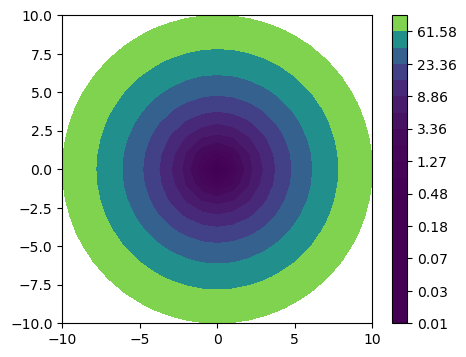

In [4]:
# Sphere function
step = 1
grid_sphere = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_sphere = func_sphere(grid_sphere)
fig_shpere, ax_shpere = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_shpere = ax_shpere.contourf(grid_sphere[0], grid_sphere[1], fv_sphere, levels=np.logspace(-2, 2, 20))
fig_shpere.colorbar(contour_shpere, ax=ax_shpere)

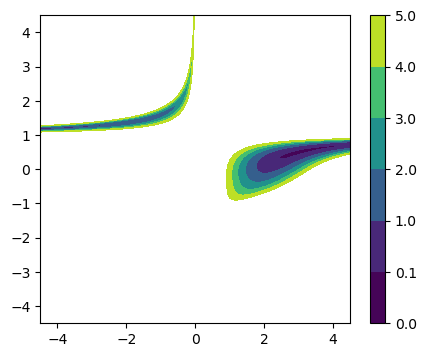

In [5]:
# Beale function
step = .01
grid_beale = np.meshgrid(np.arange(-4.5, 4.5+step, step), np.arange(-4.5, 4.5+step, step))
fv_beale = func_beale(grid_beale)
fig_beale, ax_beale = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_beale = ax_beale.contourf(grid_beale[0], grid_beale[1], fv_beale, levels=[0, 0.1, 1, 2, 3, 4, 5])
fig_beale.colorbar(contour_beale, ax=ax_beale)

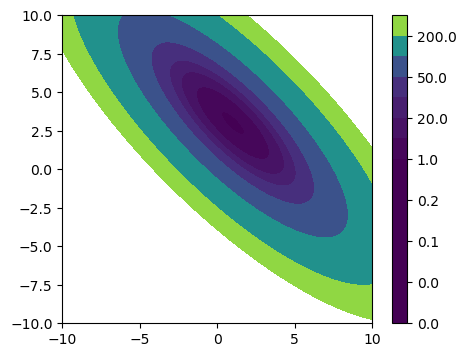

In [6]:
# Booth function
step = .01
grid_booth = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_booth = func_booth(grid_booth)
fig_booth, ax_booth = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_booth = ax_booth.contourf(grid_booth[0], grid_booth[1], fv_booth, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 30, 50, 100, 200, 300])
fig_booth.colorbar(contour_booth, ax=ax_booth)

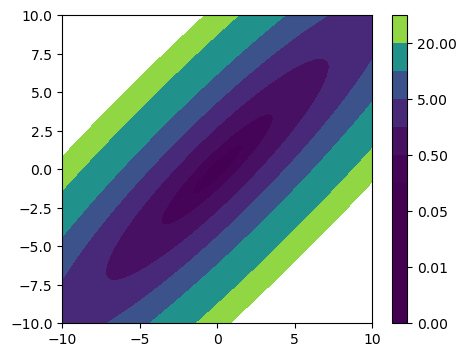

In [7]:
# Matyas function
step = .01
grid_matyas = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_matyas = func_matyas(grid_matyas)
fig_matyas, ax_matyas = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_matyas = ax_matyas.contourf(grid_matyas[0], grid_matyas[1], fv_matyas, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_matyas.colorbar(contour_matyas, ax=ax_matyas)

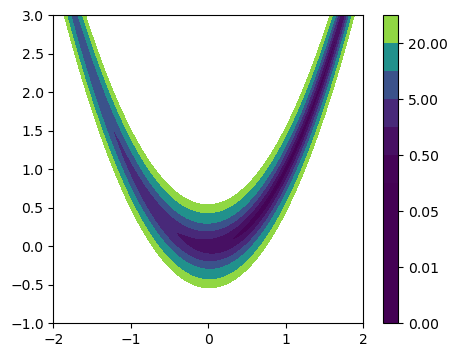

In [8]:
# Rosenbrock function
step = .01
grid_rosenbrock = np.meshgrid(np.arange(-2, 2+step, step), np.arange(-1, 3+step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)
fig_rosenbrock, ax_rosenbrock = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

In [10]:
#################################### Define optimization problem  ####################################
obj = func_rosenbrock

#################################### Tolerance setting ####################################
tol = 1e-2

#################################### Initial guess ####################################
x_cur = np.array([0, 3]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 웬만하면 vector는 1차원 array로, matrix는 2차원 array로 쓰는 걸 추천. GPT가 수치적으로는 그게 안정적이라고 추천함.

x_opt = stp_descent(obj, x_cur, tol)
# x_opt = cg_hs(obj, x_cur, tol)
# x_opt = cg_fr(obj, x_cur, tol)
# x_opt = newton(obj, x_cur, tol)
# x_opt = quasi_newton_bfgs(obj, x_cur, tol)

Since |grad(x0)| = 600.0033333060798 > 0.01, x0 : [0 3] is not an optimum point. Optimization begins !
x_1 : [ 0.01850696 -2.55208661]
f_1 : 652.4527666165145
norm(grad(x_1)) : 510.76655221772086
recent alpha : 0.00925347767736579
recent p : [   1.99999999 -599.99999998]

x_2 : [-0.13875677  2.18925952]
f_2 : 472.1894051543702
norm(grad(x_2)) : 449.79963898673634
recent alpha : 0.009287909507479371
recent p : [-16.93209055 510.4858227 ]

x_3 : [-0.8365016  -0.37347426]
f_3 : 118.55053389359463
norm(grad(x_3)) : 421.5125345066287
recent alpha : 0.005904900000000001
recent p : [-118.16369977 -434.00121577]

x_4 : [1.30561593 0.89396433]
f_4 : 65.81176200761234
norm(grad(x_4)) : 453.923301614822
recent alpha : 0.005904900000000001
recent p : [362.76948389 214.64183726]

x_5 : [-1.47611669  1.95772369]
f_5 : 11.023956392825209
norm(grad(x_5)) : 142.5933446343146
recent alpha : 0.006561000000000001
recent p : [-423.97997522  162.13372371]

x_6 : [-1.34262396  2.00128932]
f_6 : 9.43407864684